<a href="https://colab.research.google.com/github/rsaraa/Survival-Prediction-Of-HCC/blob/main/Survival_Prediction_Of_HCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

###**PREPROCESSING**

In [ ]:
data=pd.read_csv("/content/hcc-data.csv")
data.head()

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALP,TP,Creatinine,Nodule,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,1,0,1,0,0,0,0,1,0,1,...,150,7.1,0.7,1,3.5,0.5,?,?,?,1
1,0,?,0,0,0,0,1,1,?,?,...,?,?,?,1,1.8,?,?,?,?,1
2,1,0,1,1,0,1,0,1,0,1,...,109,7,2.1,5,13,0.1,28,6,16,1
3,1,1,1,0,0,0,0,1,0,1,...,174,8.1,1.11,2,15.7,0.2,?,?,?,0
4,1,1,1,1,0,1,0,1,0,1,...,109,6.9,1.8,1,9,?,59,15,22,1


In [ ]:
p_data=data.replace("?", 0)
p_data.head()

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALP,TP,Creatinine,Nodule,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,1,0,1,0,0,0,0,1,0,1,...,150,7.1,0.7,1,3.5,0.5,0,0,0,1
1,0,0,0,0,0,0,1,1,0,0,...,0,0,0,1,1.8,0,0,0,0,1
2,1,0,1,1,0,1,0,1,0,1,...,109,7,2.1,5,13,0.1,28,6,16,1
3,1,1,1,0,0,0,0,1,0,1,...,174,8.1,1.11,2,15.7,0.2,0,0,0,0
4,1,1,1,1,0,1,0,1,0,1,...,109,6.9,1.8,1,9,0,59,15,22,1


In [ ]:
p_data=data.replace("?",np.nan)
p_data.head()

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALP,TP,Creatinine,Nodule,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,1,0,1,0,0,0,0,1,0,1,...,150,7.1,0.7,1,3.5,0.5,NaN,NaN,NaN,1
1,0,NaN,0,0,0,0,1,1,NaN,NaN,...,NaN,NaN,NaN,1,1.8,NaN,NaN,NaN,NaN,1
2,1,0,1,1,0,1,0,1,0,1,...,109,7,2.1,5,13,0.1,28,6,16,1
3,1,1,1,0,0,0,0,1,0,1,...,174,8.1,1.11,2,15.7,0.2,NaN,NaN,NaN,0
4,1,1,1,1,0,1,0,1,0,1,...,109,6.9,1.8,1,9,NaN,59,15,22,1


In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
p_data = pd.DataFrame(imputer.fit_transform(p_data))
p_data = p_data.round().astype(int)
p_data.columns = data.columns
p_data.index = data.index
p_data.to_csv("preprocessed.csv", index=False)
p_data.head()

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALP,TP,Creatinine,Nodule,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,1,0,1,0,0,0,0,1,0,1,...,150,7,1,1,4,0,172,79,658,1
1,0,0,0,0,0,0,1,1,0,0,...,116,8,1,1,2,1,144,53,739,1
2,1,0,1,1,0,1,0,1,0,1,...,109,7,2,5,13,0,28,6,16,1
3,1,1,1,0,0,0,0,1,0,1,...,174,8,1,2,16,0,67,23,277,0
4,1,1,1,1,0,1,0,1,0,1,...,109,7,2,1,9,0,59,15,22,1


Class
1    102
0     63
Name: count, dtype: int64


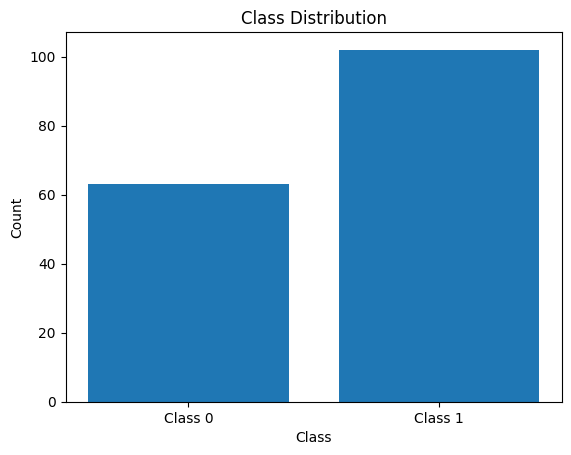

In [ ]:
import matplotlib.pyplot as plt
count = data['Class'].value_counts()
labels = ['Class 0', 'Class 1']
values = [count[0], count[1]]
print(count)
plt.bar(labels, values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

Class
1    102
0    102
Name: count, dtype: int64


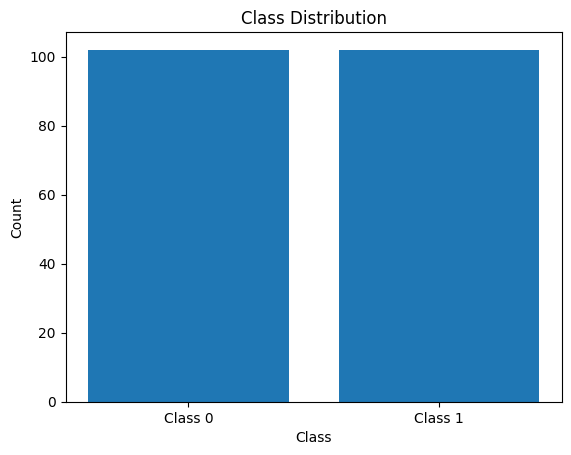

In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd

X = p_data.drop(columns=['Class'])
y = p_data['Class']
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
balanced_data = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['Class'])], axis=1)
count = balanced_data['Class'].value_counts()
labels = ['Class 0', 'Class 1']
values = [count[0], count[1]]
print(count)
plt.bar(labels, values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()
balanced_data.to_csv("hcc-data-complete-balanced.csv", index=False)

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
x = data.drop(["Class"], axis=1)
y = data['Class']
x_train_res, x_test, y_train_res, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

###**WITHOUT FEATURE SELECTION**

DECSION TREE

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.read_csv('/content/hcc-data-complete-balanced.csv')

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.7156862745098039
Confusion Matrix:
 [[39 14]
 [15 34]]


RANDOM FOREST

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

df = pd.read_csv('/content/hcc-data-complete-balanced.csv')
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Confusion Matrix:\n", conf_matrix_rf)

Random Forest Accuracy: 0.8095238095238095
Random Forest Confusion Matrix:
 [[12  0]
 [ 4  5]]


KNN

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

df = pd.read_csv('/content/hcc-data-complete-balanced.csv')

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)

y_pred_knn = knn_clf.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

print("KNN Accuracy (n=5):", accuracy_knn)
print("KNN Confusion Matrix:\n", conf_matrix_knn)


KNN Accuracy (n=5): 0.6190476190476191
KNN Confusion Matrix:
 [[6 6]
 [2 7]]


NAIVE BAYES

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

df = pd.read_csv('/content/hcc-data-complete-balanced.csv')

X = df.drop('Class', axis=1)
y = df['Class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

y_pred_nb = nb_clf.predict(X_test)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

print("Naive Bayes Accuracy:", accuracy_nb)
print("Naive Bayes Confusion Matrix:\n", conf_matrix_nb)

Naive Bayes Accuracy: 0.5772357723577236
Naive Bayes Confusion Matrix:
 [[30 31]
 [21 41]]


##**BPSO**

###**DECISION TREE**

###SIGMOID

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

class PSO:
    def __init__(self, n_particles, n_features, classifier, data, labels, n_iterations=50):
        self.n_particles = n_particles
        self.n_features = n_features
        self.n_iterations = n_iterations
        self.data = data
        self.labels = labels
        self.classifier = classifier

        self.particles = np.random.randint(2, size=(n_particles, n_features))
        self.velocities = np.random.uniform(-1, 1, (n_particles, n_features))

        self.personal_best_positions = self.particles.copy()
        self.personal_best_scores = np.full(n_particles, -np.inf)
        self.global_best_position = None
        self.global_best_score = -np.inf

    def fitness(self, particle):
        selected_features = np.where(particle == 1)[0]
        if len(selected_features) == 0:
            return -np.inf
        X_train, X_test, y_train, y_test = train_test_split(self.data[:, selected_features], self.labels, test_size=0.2)
        self.classifier.fit(X_train, y_train)
        predictions = self.classifier.predict(X_test)
        return accuracy_score(y_test, predictions)

    def optimize(self):
        for iteration in range(self.n_iterations):
            for i, particle in enumerate(self.particles):
                fitness_value = self.fitness(particle)

                if fitness_value > self.personal_best_scores[i]:
                    self.personal_best_scores[i] = fitness_value
                    self.personal_best_positions[i] = particle.copy()

                if fitness_value > self.global_best_score:
                    self.global_best_score = fitness_value
                    self.global_best_position = particle.copy()

            for i, particle in enumerate(self.particles):
                r1 = np.random.random(self.n_features)
                r2 = np.random.random(self.n_features)
                cognitive_velocity = r1 * (self.personal_best_positions[i] - particle)
                social_velocity = r2 * (self.global_best_position - particle)
                self.velocities[i] = 0.5 * self.velocities[i] + cognitive_velocity + social_velocity
                self.particles[i] = np.where(np.random.random(self.n_features) < self.sigmoid(self.velocities[i]), 1, 0)

        return self.global_best_position, self.global_best_score

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

if __name__ == '__main__':
    data_df = pd.read_csv('hcc-data-complete-balanced.csv')
    feature_names = data_df.columns[:-1].tolist()
    data = data_df.values
    labels = data[:, -1]
    data = data[:, :-1]
    classifier = DecisionTreeClassifier()
    pso = PSO(n_particles=20, n_features=data.shape[1], classifier=classifier, data=data, labels=labels)
    best_features, best_score = pso.optimize()

    print("Best feature subset :", best_features)
    print("Best classification accuracy:", best_score)
    selected_feature_indices = np.where(best_features == 1)[0]
    selected_feature_names = [feature_names[i] for i in selected_feature_indices]
    print('Selected features:', selected_feature_names)
    selected_data = data[:, selected_feature_indices]
    selected_data_df = pd.DataFrame(selected_data, columns=selected_feature_names)
    selected_data_df['Class'] = labels
    selected_data_df.to_csv('selected_features_pso_dt.csv', index=False)

Best feature subset : [0 0 1 1 1 0 1 0 0 0 1 0 1 1 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 1 0
 1 1 1 1 1 1 1 0 1 1 1 1]
Best classification accuracy: 0.926829268292683
Selected features: ['Alcohol', 'HBsAg', 'HBeAg', 'HCVAb', 'Diabetes', 'Hemochro', 'AHT', 'CRI', 'HIV', 'Varices', 'PHT', 'PVT', 'Age', 'Packs_year', 'INR', 'Hemoglobin', 'Platelets', 'Albumin', 'ALT', 'AST', 'GGT', 'ALP', 'TP', 'Creatinine', 'Nodule', 'Dir_Bil', 'Iron', 'Sat', 'Ferritin']


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

class PSO:
    def __init__(self, n_particles, n_features, classifier, data, labels, n_iterations=50):
        self.n_particles = n_particles
        self.n_features = n_features
        self.n_iterations = n_iterations
        self.data = data
        self.labels = labels
        self.classifier = classifier
        self.particles = np.random.randint(2, size=(n_particles, n_features))
        self.velocities = np.random.uniform(-1, 1, (n_particles, n_features))
        self.personal_best_positions = self.particles.copy()
        self.personal_best_scores = np.full(n_particles, -np.inf)
        self.global_best_position = None
        self.global_best_score = -np.inf

    def fitness(self, particle):
        selected_features = np.where(particle == 1)[0]
        if len(selected_features) == 0:
            return -np.inf
        X_train, X_test, y_train, y_test = train_test_split(self.data[:, selected_features], self.labels, test_size=0.2)
        self.classifier.fit(X_train, y_train)
        predictions = self.classifier.predict(X_test)
        return accuracy_score(y_test, predictions)

    def optimize(self):
      for iteration in range(self.n_iterations):
        for i, particle in enumerate(self.particles):
            fitness_value = self.fitness(particle)
            if fitness_value > self.personal_best_scores[i]:
                self.personal_best_scores[i] = fitness_value
                self.personal_best_positions[i] = particle.copy()
            if fitness_value > self.global_best_score:
                self.global_best_score = fitness_value
                self.global_best_position = particle.copy()
        for i, particle in enumerate(self.particles):
            r1 = np.random.random(self.n_features)
            r2 = np.random.random(self.n_features)
            cognitive_velocity = r1 * (self.personal_best_positions[i] - particle)
            social_velocity = r2 * (self.global_best_position - particle)
            self.velocities[i] = 0.5 * self.velocities[i] + cognitive_velocity + social_velocity
            self.particles[i] = np.where(np.random.random(self.n_features) < self.sigmoid(self.velocities[i]), 1, 0)
        print(f"Iteration {iteration + 1}:")
        print(f"Global Best Accuracy: {self.global_best_score}")
        selected_feature_indices = np.where(self.global_best_position == 1)[0]
        selected_feature_names = [feature_names[i] for i in selected_feature_indices]
        print(f"Selected Features: {selected_feature_names}")
        print(f"Number of features selected: {len(selected_feature_indices)}\n")
      return self.global_best_position, self.global_best_score


    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

if __name__ == '__main__':
    data_df = pd.read_csv('hcc-data-complete-balanced.csv')
    feature_names = data_df.columns[:-1].tolist()
    data = data_df.values
    labels = data[:, -1]
    data = data[:, :-1]
    classifier = DecisionTreeClassifier()
    pso = PSO(n_particles=20, n_features=data.shape[1], classifier=classifier, data=data, labels=labels)
    best_features, best_score = pso.optimize()
    print("Best feature subset (final):", best_features)
    selected_feature_indices = np.where(best_features == 1)[0]
    selected_feature_names = [feature_names[i] for i in selected_feature_indices]
    print('Selected features (final):', selected_feature_names)
    selected_data = data[:, selected_feature_indices]
    selected_data_df = pd.DataFrame(selected_data, columns=selected_feature_names)
    selected_data_df['Class'] = labels
    selected_data_df.to_csv('selected_features_pso_DT.csv', index=False)

Iteration 1:
Global Best Accuracy: 0.8048780487804879
Selected Features: ['Gender', 'Symptoms', 'Alcohol', 'HCVAb', 'Smoking', 'HIV', 'Spleno', 'PHT', 'Hallmark', 'Age', 'Packs_year', 'PS', 'Encephalopathy', 'AFP', 'Hemoglobin', 'MCV', 'Albumin', 'AST', 'TP', 'Nodule', 'Major_Dim', 'Dir_Bil', 'Iron', 'Sat']
Number of features selected: 24

Iteration 2:
Global Best Accuracy: 0.8048780487804879
Selected Features: ['Gender', 'Symptoms', 'Alcohol', 'HCVAb', 'Smoking', 'HIV', 'Spleno', 'PHT', 'Hallmark', 'Age', 'Packs_year', 'PS', 'Encephalopathy', 'AFP', 'Hemoglobin', 'MCV', 'Albumin', 'AST', 'TP', 'Nodule', 'Major_Dim', 'Dir_Bil', 'Iron', 'Sat']
Number of features selected: 24

Iteration 3:
Global Best Accuracy: 0.8048780487804879
Selected Features: ['Gender', 'Symptoms', 'Alcohol', 'HCVAb', 'Smoking', 'HIV', 'Spleno', 'PHT', 'Hallmark', 'Age', 'Packs_year', 'PS', 'Encephalopathy', 'AFP', 'Hemoglobin', 'MCV', 'Albumin', 'AST', 'TP', 'Nodule', 'Major_Dim', 'Dir_Bil', 'Iron', 'Sat']
Number 

###V2 function


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

class PSO:
    def __init__(self, n_particles, n_features, classifier, data, labels, n_iterations=50):
        self.n_particles = n_particles
        self.n_features = n_features
        self.n_iterations = n_iterations
        self.data = data
        self.labels = labels
        self.classifier = classifier

        self.particles = np.random.randint(2, size=(n_particles, n_features))
        self.velocities = np.random.uniform(-1, 1, (n_particles, n_features))

        self.personal_best_positions = self.particles.copy()
        self.personal_best_scores = np.full(n_particles, -np.inf)
        self.global_best_position = None
        self.global_best_score = -np.inf

    def fitness(self, particle):
        selected_features = np.where(particle == 1)[0]
        if len(selected_features) == 0:
            return -np.inf
        X_train, X_test, y_train, y_test = train_test_split(self.data[:, selected_features], self.labels, test_size=0.2)
        self.classifier.fit(X_train, y_train)
        predictions = self.classifier.predict(X_test)
        return accuracy_score(y_test, predictions)

    def optimize(self):
        for iteration in range(self.n_iterations):
            for i, particle in enumerate(self.particles):
                fitness_value = self.fitness(particle)

                if fitness_value > self.personal_best_scores[i]:
                    self.personal_best_scores[i] = fitness_value
                    self.personal_best_positions[i] = particle.copy()

                if fitness_value > self.global_best_score:
                    self.global_best_score = fitness_value
                    self.global_best_position = particle.copy()
            for i, particle in enumerate(self.particles):
                r1 = np.random.random(self.n_features)
                r2 = np.random.random(self.n_features)
                cognitive_velocity = r1 * (self.personal_best_positions[i] - particle)
                social_velocity = r2 * (self.global_best_position - particle)
                self.velocities[i] = 0.5 * self.velocities[i] + cognitive_velocity + social_velocity
                self.particles[i] = np.where(np.random.random(self.n_features) < self.v_function(self.velocities[i]), 1, 0)
        return self.global_best_position, self.global_best_score
    def v_function(self, x):
        return np.abs(2 / np.pi * np.arctan(np.pi / 2 * x))

if __name__ == '__main__':
    data_df = pd.read_csv('hcc-data-complete-balanced.csv')
    feature_names = data_df.columns[:-1].tolist()
    data = data_df.values
    labels = data[:, -1]
    data = data[:, :-1]
    classifier = DecisionTreeClassifier()
    pso = PSO(n_particles=20, n_features=data.shape[1], classifier=classifier, data=data, labels=labels)
    best_features, best_score = pso.optimize()
    print("Best feature subset :", best_features)
    print("Best classification accuracy:", best_score)
    print(np.sum(best_features))
    selected_feature_indices = np.where(best_features == 1)[0]
    selected_feature_names = [feature_names[i] for i in selected_feature_indices]
    print('Selected features:', selected_feature_names)
    selected_data = data[:, selected_feature_indices]
    selected_data_df = pd.DataFrame(selected_data, columns=selected_feature_names)
    selected_data_df['Class'] = labels
    selected_data_df.to_csv('selected_features_pso_dt_v.csv', index=False)

Best feature subset : [0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0
 1 1 0 1 0 0 0 1 1 0 0 0]
Best classification accuracy: 0.9512195121951219
15
Selected features: ['Cirrhosis', 'AHT', 'CRI', 'NASH', 'PVT', 'Hallmark', 'Encephalopathy', 'INR', 'Platelets', 'Albumin', 'ALT', 'AST', 'ALP', 'Major_Dim', 'Dir_Bil']


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

class PSO:
    def __init__(self, n_particles, n_features, classifier, data, labels, n_iterations=50):
        self.n_particles = n_particles
        self.n_features = n_features
        self.n_iterations = n_iterations
        self.data = data
        self.labels = labels
        self.classifier = classifier
        self.particles = np.random.randint(2, size=(n_particles, n_features))
        self.velocities = np.random.uniform(-1, 1, (n_particles, n_features))
        self.personal_best_positions = self.particles.copy()
        self.personal_best_scores = np.full(n_particles, -np.inf)
        self.global_best_position = None
        self.global_best_score = -np.inf

    def fitness(self, particle):
        selected_features = np.where(particle == 1)[0]
        if len(selected_features) == 0:
            return -np.inf
        X_train, X_test, y_train, y_test = train_test_split(self.data[:, selected_features], self.labels, test_size=0.2)
        self.classifier.fit(X_train, y_train)
        predictions = self.classifier.predict(X_test)
        return accuracy_score(y_test, predictions)

    def optimize(self):
      for iteration in range(self.n_iterations):
        for i, particle in enumerate(self.particles):
            fitness_value = self.fitness(particle)
            if fitness_value > self.personal_best_scores[i]:
                self.personal_best_scores[i] = fitness_value
                self.personal_best_positions[i] = particle.copy()
            if fitness_value > self.global_best_score:
                self.global_best_score = fitness_value
                self.global_best_position = particle.copy()
        for i, particle in enumerate(self.particles):
            r1 = np.random.random(self.n_features)
            r2 = np.random.random(self.n_features)
            cognitive_velocity = r1 * (self.personal_best_positions[i] - particle)
            social_velocity = r2 * (self.global_best_position - particle)
            self.velocities[i] = 0.5 * self.velocities[i] + cognitive_velocity + social_velocity
            self.particles[i] = np.where(np.random.random(self.n_features) < self.sigmoid(self.velocities[i]), 1, 0)
        print(f"Iteration {iteration + 1}:")
        print(f"Global Best Accuracy: {self.global_best_score}")
        selected_feature_indices = np.where(self.global_best_position == 1)[0]
        selected_feature_names = [feature_names[i] for i in selected_feature_indices]
        print(f"Selected Features: {selected_feature_names}")
        print(f"Number of features selected: {len(selected_feature_indices)}\n")
      return self.global_best_position, self.global_best_score


    def sigmoid(self, x):
        return np.abs(2 / np.pi * np.arctan(np.pi / 2 * x))

if __name__ == '__main__':
    data_df = pd.read_csv('hcc-data-complete-balanced.csv')
    feature_names = data_df.columns[:-1].tolist()
    data = data_df.values
    labels = data[:, -1]
    data = data[:, :-1]
    classifier = DecisionTreeClassifier()
    pso = PSO(n_particles=20, n_features=data.shape[1], classifier=classifier, data=data, labels=labels)
    best_features, best_score = pso.optimize()
    print("Best feature subset (final):", best_features)
    selected_feature_indices = np.where(best_features == 1)[0]
    selected_feature_names = [feature_names[i] for i in selected_feature_indices]
    print('Selected features (final):', selected_feature_names)
    selected_data = data[:, selected_feature_indices]
    selected_data_df = pd.DataFrame(selected_data, columns=selected_feature_names)
    selected_data_df['Class'] = labels
    selected_data_df.to_csv('selected_features_pso_DT_v2.csv', index=False)

Iteration 1:
Global Best Accuracy: 0.8536585365853658
Selected Features: ['Gender', 'Symptoms', 'Alcohol', 'HBeAg', 'HBcAb', 'HCVAb', 'Diabetes', 'Obesity', 'AHT', 'CRI', 'Varices', 'PHT', 'PVT', 'Metastasis', 'Hallmark', 'PS', 'INR', 'AFP', 'Leucocytes', 'Platelets', 'Total_Bil', 'AST', 'TP', 'Nodule', 'Ferritin']
Number of features selected: 25

Iteration 2:
Global Best Accuracy: 0.8536585365853658
Selected Features: ['Gender', 'Symptoms', 'Alcohol', 'HBeAg', 'HBcAb', 'HCVAb', 'Diabetes', 'Obesity', 'AHT', 'CRI', 'Varices', 'PHT', 'PVT', 'Metastasis', 'Hallmark', 'PS', 'INR', 'AFP', 'Leucocytes', 'Platelets', 'Total_Bil', 'AST', 'TP', 'Nodule', 'Ferritin']
Number of features selected: 25

Iteration 3:
Global Best Accuracy: 0.8536585365853658
Selected Features: ['Gender', 'Symptoms', 'Alcohol', 'HBeAg', 'HBcAb', 'HCVAb', 'Diabetes', 'Obesity', 'AHT', 'CRI', 'Varices', 'PHT', 'PVT', 'Metastasis', 'Hallmark', 'PS', 'INR', 'AFP', 'Leucocytes', 'Platelets', 'Total_Bil', 'AST', 'TP', 'Nodu

###RANDOM FOREST

###SIGMOID

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

class PSO:
    def __init__(self, n_particles, n_features, classifier, data, labels, n_iterations=50):
        self.n_particles = n_particles
        self.n_features = n_features
        self.n_iterations = n_iterations
        self.data = data
        self.labels = labels
        self.classifier = classifier
        self.particles = np.random.randint(2, size=(n_particles, n_features))
        self.velocities = np.random.uniform(-1, 1, (n_particles, n_features))
        self.personal_best_positions = self.particles.copy()
        self.personal_best_scores = np.full(n_particles, -np.inf)
        self.global_best_position = None
        self.global_best_score = -np.inf
    def fitness(self, particle):
        selected_features = np.where(particle == 1)[0]
        if len(selected_features) == 0:
            return -np.inf
        X_train, X_test, y_train, y_test = train_test_split(self.data[:, selected_features], self.labels, test_size=0.2)
        self.classifier.fit(X_train, y_train)
        predictions = self.classifier.predict(X_test)
        return accuracy_score(y_test, predictions)
    def optimize(self):
        for iteration in range(self.n_iterations):
            for i, particle in enumerate(self.particles):
                fitness_value = self.fitness(particle)
                if fitness_value > self.personal_best_scores[i]:
                    self.personal_best_scores[i] = fitness_value
                    self.personal_best_positions[i] = particle.copy()
                if fitness_value > self.global_best_score:
                    self.global_best_score = fitness_value
                    self.global_best_position = particle.copy()
            for i, particle in enumerate(self.particles):
                r1 = np.random.random(self.n_features)
                r2 = np.random.random(self.n_features)
                cognitive_velocity = r1 * (self.personal_best_positions[i] - particle)
                social_velocity = r2 * (self.global_best_position - particle)
                self.velocities[i] = 0.5 * self.velocities[i] + cognitive_velocity + social_velocity
                self.particles[i] = np.where(np.random.random(self.n_features) < self.sigmoid(self.velocities[i]), 1, 0)
        return self.global_best_position, self.global_best_score
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
if __name__ == '__main__':
    data_df = pd.read_csv('hcc-data-complete-balanced.csv')
    feature_names = data_df.columns[:-1].tolist()
    data = data_df.values
    labels = data[:, -1]
    data = data[:, :-1]
    classifier = RandomForestClassifier()
    pso = PSO(n_particles=20, n_features=data.shape[1], classifier=classifier, data=data, labels=labels)
    best_features, best_score = pso.optimize()
    print("Best feature subset :", best_features)
    print("Best classification accuracy:", best_score)
    print(np.sum(best_features))
    selected_feature_indices = np.where(best_features == 1)[0]
    selected_feature_names = [feature_names[i] for i in selected_feature_indices]
    print('Selected features:', selected_feature_names)
    selected_data = data[:, selected_feature_indices]
    selected_data_df = pd.DataFrame(selected_data, columns=selected_feature_names)
    selected_data_df['Class'] = labels
    selected_data_df.to_csv('selected_features_pso_rt.csv', index=False)

Best feature subset : [0 1 0 1 1 0 1 0 1 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 0 0 1
 0 0 0 0 0 0 0 0 1 0 0 0]
Best classification accuracy: 0.975609756097561
24
Selected features: ['Symptoms', 'HBsAg', 'HBeAg', 'HCVAb', 'Endemic', 'Smoking', 'Diabetes', 'Obesity', 'Hemochro', 'AHT', 'NASH', 'Spleno', 'PHT', 'Hallmark', 'Grams_day', 'PS', 'Encephalopathy', 'Ascites', 'AFP', 'Hemoglobin', 'MCV', 'Leucocytes', 'Total_Bil', 'Dir_Bil']


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

class PSO:
    def __init__(self, n_particles, n_features, classifier, data, labels, n_iterations=50):
        self.n_particles = n_particles
        self.n_features = n_features
        self.n_iterations = n_iterations
        self.data = data
        self.labels = labels
        self.classifier = classifier
        self.particles = np.random.randint(2, size=(n_particles, n_features))
        self.velocities = np.random.uniform(-1, 1, (n_particles, n_features))
        self.personal_best_positions = self.particles.copy()
        self.personal_best_scores = np.full(n_particles, -np.inf)
        self.global_best_position = None
        self.global_best_score = -np.inf

    def fitness(self, particle):
        selected_features = np.where(particle == 1)[0]
        if len(selected_features) == 0:
            return -np.inf
        X_train, X_test, y_train, y_test = train_test_split(self.data[:, selected_features], self.labels, test_size=0.2)
        self.classifier.fit(X_train, y_train)
        predictions = self.classifier.predict(X_test)
        return accuracy_score(y_test, predictions)

    def optimize(self):
      for iteration in range(self.n_iterations):
        for i, particle in enumerate(self.particles):
            fitness_value = self.fitness(particle)
            if fitness_value > self.personal_best_scores[i]:
                self.personal_best_scores[i] = fitness_value
                self.personal_best_positions[i] = particle.copy()
            if fitness_value > self.global_best_score:
                self.global_best_score = fitness_value
                self.global_best_position = particle.copy()
        for i, particle in enumerate(self.particles):
            r1 = np.random.random(self.n_features)
            r2 = np.random.random(self.n_features)
            cognitive_velocity = r1 * (self.personal_best_positions[i] - particle)
            social_velocity = r2 * (self.global_best_position - particle)
            self.velocities[i] = 0.5 * self.velocities[i] + cognitive_velocity + social_velocity
            self.particles[i] = np.where(np.random.random(self.n_features) < self.sigmoid(self.velocities[i]), 1, 0)
        print(f"Iteration {iteration + 1}:")
        print(f"Global Best Accuracy: {self.global_best_score}")
        selected_feature_indices = np.where(self.global_best_position == 1)[0]
        selected_feature_names = [feature_names[i] for i in selected_feature_indices]
        print(f"Selected Features: {selected_feature_names}")
        print(f"Number of features selected: {len(selected_feature_indices)}\n")
      return self.global_best_position, self.global_best_score


    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

if __name__ == '__main__':
    data_df = pd.read_csv('hcc-data-complete-balanced.csv')
    feature_names = data_df.columns[:-1].tolist()
    data = data_df.values
    labels = data[:, -1]
    data = data[:, :-1]
    classifier = RandomForestClassifier()
    pso = PSO(n_particles=20, n_features=data.shape[1], classifier=classifier, data=data, labels=labels)
    best_features, best_score = pso.optimize()
    print("Best feature subset (final):", best_features)
    selected_feature_indices = np.where(best_features == 1)[0]
    selected_feature_names = [feature_names[i] for i in selected_feature_indices]
    print('Selected features (final):', selected_feature_names)
    selected_data = data[:, selected_feature_indices]
    selected_data_df = pd.DataFrame(selected_data, columns=selected_feature_names)
    selected_data_df['Class'] = labels
    selected_data_df.to_csv('selected_features_pso_RT.csv', index=False)

Iteration 1:
Global Best Accuracy: 0.8292682926829268
Selected Features: ['Gender', 'Alcohol', 'HBeAg', 'HCVAb', 'Cirrhosis', 'Smoking', 'Diabetes', 'AHT', 'CRI', 'NASH', 'PHT', 'PVT', 'Metastasis', 'Age', 'Grams_day', 'Packs_year', 'Encephalopathy', 'Ascites', 'AFP', 'Hemoglobin', 'Platelets', 'Total_Bil', 'ALP', 'TP', 'Creatinine', 'Nodule', 'Major_Dim', 'Dir_Bil', 'Sat', 'Ferritin']
Number of features selected: 30

Iteration 2:
Global Best Accuracy: 0.8780487804878049
Selected Features: ['Symptoms', 'HBsAg', 'HBeAg', 'HBcAb', 'Cirrhosis', 'Diabetes', 'Obesity', 'Hemochro', 'AHT', 'CRI', 'NASH', 'Varices', 'Spleno', 'PHT', 'PVT', 'Age', 'Grams_day', 'Encephalopathy', 'AFP', 'Platelets', 'Albumin', 'Total_Bil', 'ALT', 'AST', 'GGT', 'TP', 'Creatinine', 'Nodule', 'Major_Dim', 'Iron']
Number of features selected: 30

Iteration 3:
Global Best Accuracy: 0.8780487804878049
Selected Features: ['Symptoms', 'HBsAg', 'HBeAg', 'HBcAb', 'Cirrhosis', 'Diabetes', 'Obesity', 'Hemochro', 'AHT', 'CRI'

###V2 function





In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

class PSO:
    def __init__(self, n_particles, n_features, classifier, data, labels, n_iterations=50):
        self.n_particles = n_particles
        self.n_features = n_features
        self.n_iterations = n_iterations
        self.data = data
        self.labels = labels
        self.classifier = classifier

        self.particles = np.random.randint(2, size=(n_particles, n_features))
        self.velocities = np.random.uniform(-1, 1, (n_particles, n_features))

        self.personal_best_positions = self.particles.copy()
        self.personal_best_scores = np.full(n_particles, -np.inf)
        self.global_best_position = None
        self.global_best_score = -np.inf

    def fitness(self, particle):
        selected_features = np.where(particle == 1)[0]
        if len(selected_features) == 0:
            return -np.inf
        X_train, X_test, y_train, y_test = train_test_split(self.data[:, selected_features], self.labels, test_size=0.2)
        self.classifier.fit(X_train, y_train)
        predictions = self.classifier.predict(X_test)
        return accuracy_score(y_test, predictions)

    def optimize(self):
        for iteration in range(self.n_iterations):
            for i, particle in enumerate(self.particles):
                fitness_value = self.fitness(particle)

                if fitness_value > self.personal_best_scores[i]:
                    self.personal_best_scores[i] = fitness_value
                    self.personal_best_positions[i] = particle.copy()

                if fitness_value > self.global_best_score:
                    self.global_best_score = fitness_value
                    self.global_best_position = particle.copy()
            for i, particle in enumerate(self.particles):
                r1 = np.random.random(self.n_features)
                r2 = np.random.random(self.n_features)
                cognitive_velocity = r1 * (self.personal_best_positions[i] - particle)
                social_velocity = r2 * (self.global_best_position - particle)
                self.velocities[i] = 0.5 * self.velocities[i] + cognitive_velocity + social_velocity
                self.particles[i] = np.where(np.random.random(self.n_features) < self.v_function(self.velocities[i]), 1, 0)
        return self.global_best_position, self.global_best_score
    def v_function(self, x):
        return np.abs(2 / np.pi * np.arctan(np.pi / 2 * x))

if __name__ == '__main__':
    data_df = pd.read_csv('hcc-data-complete-balanced.csv')
    feature_names = data_df.columns[:-1].tolist()
    data = data_df.values
    labels = data[:, -1]
    data = data[:, :-1]
    classifier = RandomForestClassifier()
    pso = PSO(n_particles=20, n_features=data.shape[1], classifier=classifier, data=data, labels=labels)
    best_features, best_score = pso.optimize()
    print("Best feature subset :", best_features)
    print("Best classification accuracy:", best_score)
    print(np.sum(best_features))
    selected_feature_indices = np.where(best_features == 1)[0]
    selected_feature_names = [feature_names[i] for i in selected_feature_indices]
    print('Selected features:', selected_feature_names)
    selected_data = data[:, selected_feature_indices]
    selected_data_df = pd.DataFrame(selected_data, columns=selected_feature_names)
    selected_data_df['Class'] = labels
    selected_data_df.to_csv('selected_features_pso_rt_v2.csv', index=False)

Best feature subset : [0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0]
Best classification accuracy: 0.926829268292683
15
Selected features: ['HBsAg', 'HBeAg', 'Smoking', 'Obesity', 'AHT', 'CRI', 'PHT', 'Metastasis', 'Grams_day', 'Packs_year', 'Ascites', 'AFP', 'MCV', 'TP', 'Sat']


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

class PSO:
    def __init__(self, n_particles, n_features, classifier, data, labels, n_iterations=50):
        self.n_particles = n_particles
        self.n_features = n_features
        self.n_iterations = n_iterations
        self.data = data
        self.labels = labels
        self.classifier = classifier
        self.particles = np.random.randint(2, size=(n_particles, n_features))
        self.velocities = np.random.uniform(-1, 1, (n_particles, n_features))
        self.personal_best_positions = self.particles.copy()
        self.personal_best_scores = np.full(n_particles, -np.inf)
        self.global_best_position = None
        self.global_best_score = -np.inf

    def fitness(self, particle):
        selected_features = np.where(particle == 1)[0]
        if len(selected_features) == 0:
            return -np.inf
        X_train, X_test, y_train, y_test = train_test_split(self.data[:, selected_features], self.labels, test_size=0.2)
        self.classifier.fit(X_train, y_train)
        predictions = self.classifier.predict(X_test)
        return accuracy_score(y_test, predictions)

    def optimize(self):
      for iteration in range(self.n_iterations):
        for i, particle in enumerate(self.particles):
            fitness_value = self.fitness(particle)
            if fitness_value > self.personal_best_scores[i]:
                self.personal_best_scores[i] = fitness_value
                self.personal_best_positions[i] = particle.copy()
            if fitness_value > self.global_best_score:
                self.global_best_score = fitness_value
                self.global_best_position = particle.copy()
        for i, particle in enumerate(self.particles):
            r1 = np.random.random(self.n_features)
            r2 = np.random.random(self.n_features)
            cognitive_velocity = r1 * (self.personal_best_positions[i] - particle)
            social_velocity = r2 * (self.global_best_position - particle)
            self.velocities[i] = 0.5 * self.velocities[i] + cognitive_velocity + social_velocity
            self.particles[i] = np.where(np.random.random(self.n_features) < self.sigmoid(self.velocities[i]), 1, 0)
        print(f"Iteration {iteration + 1}:")
        print(f"Global Best Accuracy: {self.global_best_score}")
        selected_feature_indices = np.where(self.global_best_position == 1)[0]
        selected_feature_names = [feature_names[i] for i in selected_feature_indices]
        print(f"Selected Features: {selected_feature_names}")
        print(f"Number of features selected: {len(selected_feature_indices)}\n")
      return self.global_best_position, self.global_best_score


    def sigmoid(self, x):
        return np.abs(2 / np.pi * np.arctan(np.pi / 2 * x))

if __name__ == '__main__':
    data_df = pd.read_csv('hcc-data-complete-balanced.csv')
    feature_names = data_df.columns[:-1].tolist()
    data = data_df.values
    labels = data[:, -1]
    data = data[:, :-1]
    classifier = RandomForestClassifier()
    pso = PSO(n_particles=20, n_features=data.shape[1], classifier=classifier, data=data, labels=labels)
    best_features, best_score = pso.optimize()
    print("Best feature subset (final):", best_features)
    selected_feature_indices = np.where(best_features == 1)[0]
    selected_feature_names = [feature_names[i] for i in selected_feature_indices]
    print('Selected features (final):', selected_feature_names)
    selected_data = data[:, selected_feature_indices]
    selected_data_df = pd.DataFrame(selected_data, columns=selected_feature_names)
    selected_data_df['Class'] = labels
    selected_data_df.to_csv('selected_features_pso_RT_v2.csv', index=False)

Iteration 1:
Global Best Accuracy: 0.8780487804878049
Selected Features: ['Symptoms', 'HBeAg', 'HBcAb', 'HCVAb', 'Smoking', 'Varices', 'Spleno', 'PHT', 'PVT', 'Metastasis', 'Age', 'Ascites', 'INR', 'AFP', 'Leucocytes', 'Platelets', 'ALT', 'GGT', 'Creatinine', 'Dir_Bil', 'Iron', 'Ferritin']
Number of features selected: 22

Iteration 2:
Global Best Accuracy: 0.8780487804878049
Selected Features: ['Symptoms', 'HBeAg', 'HBcAb', 'HCVAb', 'Smoking', 'Varices', 'Spleno', 'PHT', 'PVT', 'Metastasis', 'Age', 'Ascites', 'INR', 'AFP', 'Leucocytes', 'Platelets', 'ALT', 'GGT', 'Creatinine', 'Dir_Bil', 'Iron', 'Ferritin']
Number of features selected: 22

Iteration 3:
Global Best Accuracy: 0.8780487804878049
Selected Features: ['Symptoms', 'HBeAg', 'HBcAb', 'HCVAb', 'Smoking', 'Varices', 'Spleno', 'PHT', 'PVT', 'Metastasis', 'Age', 'Ascites', 'INR', 'AFP', 'Leucocytes', 'Platelets', 'ALT', 'GGT', 'Creatinine', 'Dir_Bil', 'Iron', 'Ferritin']
Number of features selected: 22

Iteration 4:
Global Best Acc

###KNN

###SIGMOID

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

class PSO:
    def __init__(self, n_particles, n_features, classifier, data, labels, n_iterations=50):
        self.n_particles = n_particles
        self.n_features = n_features
        self.n_iterations = n_iterations
        self.data = data
        self.labels = labels
        self.classifier = classifier
        self.particles = np.random.randint(2, size=(n_particles, n_features))
        self.velocities = np.random.uniform(-1, 1, (n_particles, n_features))
        self.personal_best_positions = self.particles.copy()
        self.personal_best_scores = np.full(n_particles, -np.inf)
        self.global_best_position = None
        self.global_best_score = -np.inf

    def fitness(self, particle):
        selected_features = np.where(particle == 1)[0]
        if len(selected_features) == 0:
            return -np.inf
        X_train, X_test, y_train, y_test = train_test_split(self.data[:, selected_features], self.labels, test_size=0.2)
        self.classifier.fit(X_train, y_train)
        predictions = self.classifier.predict(X_test)
        return accuracy_score(y_test, predictions)

    def optimize(self):
        for iteration in range(self.n_iterations):
            for i, particle in enumerate(self.particles):
                fitness_value = self.fitness(particle)
                if fitness_value > self.personal_best_scores[i]:
                    self.personal_best_scores[i] = fitness_value
                    self.personal_best_positions[i] = particle.copy()
                if fitness_value > self.global_best_score:
                    self.global_best_score = fitness_value
                    self.global_best_position = particle.copy()
            for i, particle in enumerate(self.particles):
                r1 = np.random.random(self.n_features)
                r2 = np.random.random(self.n_features)
                cognitive_velocity = r1 * (self.personal_best_positions[i] - particle)
                social_velocity = r2 * (self.global_best_position - particle)
                self.velocities[i] = 0.5 * self.velocities[i] + cognitive_velocity + social_velocity
                self.particles[i] = np.where(np.random.random(self.n_features) < self.sigmoid(self.velocities[i]), 1, 0)
        return self.global_best_position, self.global_best_score
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

if __name__ == '__main__':
    data_df = pd.read_csv('hcc-data-complete-balanced.csv')
    feature_names = data_df.columns[:-1].tolist()
    data = data_df.values
    labels = data[:, -1]
    data = data[:, :-1]
    classifier = KNeighborsClassifier(n_neighbors=5)
    pso = PSO(n_particles=20, n_features=data.shape[1], classifier=classifier, data=data, labels=labels)
    best_features, best_score = pso.optimize()
    print("Best feature subset :", best_features)
    print("Best classification accuracy:", best_score)
    print(np.sum(best_features))
    selected_feature_indices = np.where(best_features == 1)[0]
    selected_feature_names = [feature_names[i] for i in selected_feature_indices]
    print('Selected features:', selected_feature_names)
    selected_data = data[:, selected_feature_indices]
    selected_data_df = pd.DataFrame(selected_data, columns=selected_feature_names)
    selected_data_df['Class'] = labels
    selected_data_df.to_csv('selected_features_pso_knn.csv', index=False)

Best feature subset : [1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 1 0 0 1 1 0 1 1 0]
Best classification accuracy: 0.8780487804878049
23
Selected features: ['Gender', 'Symptoms', 'HBeAg', 'HBcAb', 'HCVAb', 'Smoking', 'Diabetes', 'Obesity', 'Hemochro', 'AHT', 'CRI', 'Spleno', 'PVT', 'Hallmark', 'Grams_day', 'AFP', 'Albumin', 'AST', 'ALP', 'Nodule', 'Major_Dim', 'Iron', 'Sat']


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

class PSO:
    def __init__(self, n_particles, n_features, classifier, data, labels, n_iterations=50):
        self.n_particles = n_particles
        self.n_features = n_features
        self.n_iterations = n_iterations
        self.data = data
        self.labels = labels
        self.classifier = classifier
        self.particles = np.random.randint(2, size=(n_particles, n_features))
        self.velocities = np.random.uniform(-1, 1, (n_particles, n_features))
        self.personal_best_positions = self.particles.copy()
        self.personal_best_scores = np.full(n_particles, -np.inf)
        self.global_best_position = None
        self.global_best_score = -np.inf

    def fitness(self, particle):
        selected_features = np.where(particle == 1)[0]
        if len(selected_features) == 0:
            return -np.inf
        X_train, X_test, y_train, y_test = train_test_split(self.data[:, selected_features], self.labels, test_size=0.2)
        self.classifier.fit(X_train, y_train)
        predictions = self.classifier.predict(X_test)
        return accuracy_score(y_test, predictions)

    def optimize(self):
      for iteration in range(self.n_iterations):
        for i, particle in enumerate(self.particles):
            fitness_value = self.fitness(particle)
            if fitness_value > self.personal_best_scores[i]:
                self.personal_best_scores[i] = fitness_value
                self.personal_best_positions[i] = particle.copy()
            if fitness_value > self.global_best_score:
                self.global_best_score = fitness_value
                self.global_best_position = particle.copy()
        for i, particle in enumerate(self.particles):
            r1 = np.random.random(self.n_features)
            r2 = np.random.random(self.n_features)
            cognitive_velocity = r1 * (self.personal_best_positions[i] - particle)
            social_velocity = r2 * (self.global_best_position - particle)
            self.velocities[i] = 0.5 * self.velocities[i] + cognitive_velocity + social_velocity
            self.particles[i] = np.where(np.random.random(self.n_features) < self.sigmoid(self.velocities[i]), 1, 0)
        print(f"Iteration {iteration + 1}:")
        print(f"Global Best Accuracy: {self.global_best_score}")
        selected_feature_indices = np.where(self.global_best_position == 1)[0]
        selected_feature_names = [feature_names[i] for i in selected_feature_indices]
        print(f"Selected Features: {selected_feature_names}")
        print(f"Number of features selected: {len(selected_feature_indices)}\n")
      return self.global_best_position, self.global_best_score


    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

if __name__ == '__main__':
    data_df = pd.read_csv('hcc-data-complete-balanced.csv')
    feature_names = data_df.columns[:-1].tolist()
    data = data_df.values
    labels = data[:, -1]
    data = data[:, :-1]
    classifier = KNeighborsClassifier(n_neighbors=5)
    pso = PSO(n_particles=20, n_features=data.shape[1], classifier=classifier, data=data, labels=labels)
    best_features, best_score = pso.optimize()
    print("Best feature subset (final):", best_features)
    selected_feature_indices = np.where(best_features == 1)[0]
    selected_feature_names = [feature_names[i] for i in selected_feature_indices]
    print('Selected features (final):', selected_feature_names)
    selected_data = data[:, selected_feature_indices]
    selected_data_df = pd.DataFrame(selected_data, columns=selected_feature_names)
    selected_data_df['Class'] = labels
    selected_data_df.to_csv('selected_features_pso_KNN.csv', index=False)

Iteration 1:
Global Best Accuracy: 0.7560975609756098
Selected Features: ['Gender', 'Symptoms', 'Alcohol', 'HBsAg', 'HBeAg', 'HBcAb', 'HCVAb', 'Smoking', 'Obesity', 'Hemochro', 'CRI', 'HIV', 'NASH', 'Spleno', 'PHT', 'Hallmark', 'Packs_year', 'Ascites', 'Hemoglobin', 'Albumin', 'Total_Bil', 'ALT', 'AST', 'TP', 'Creatinine', 'Dir_Bil', 'Iron']
Number of features selected: 27

Iteration 2:
Global Best Accuracy: 0.7560975609756098
Selected Features: ['Gender', 'Symptoms', 'Alcohol', 'HBsAg', 'HBeAg', 'HBcAb', 'HCVAb', 'Smoking', 'Obesity', 'Hemochro', 'CRI', 'HIV', 'NASH', 'Spleno', 'PHT', 'Hallmark', 'Packs_year', 'Ascites', 'Hemoglobin', 'Albumin', 'Total_Bil', 'ALT', 'AST', 'TP', 'Creatinine', 'Dir_Bil', 'Iron']
Number of features selected: 27

Iteration 3:
Global Best Accuracy: 0.7560975609756098
Selected Features: ['Gender', 'Symptoms', 'Alcohol', 'HBsAg', 'HBeAg', 'HBcAb', 'HCVAb', 'Smoking', 'Obesity', 'Hemochro', 'CRI', 'HIV', 'NASH', 'Spleno', 'PHT', 'Hallmark', 'Packs_year', 'Asc

###V2 Function

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

class PSO:
    def __init__(self, n_particles, n_features, classifier, data, labels, n_iterations=50):
        self.n_particles = n_particles
        self.n_features = n_features
        self.n_iterations = n_iterations
        self.data = data
        self.labels = labels
        self.classifier = classifier
        self.particles = np.random.randint(2, size=(n_particles, n_features))
        self.velocities = np.random.uniform(-1, 1, (n_particles, n_features))
        self.personal_best_positions = self.particles.copy()
        self.personal_best_scores = np.full(n_particles, -np.inf)
        self.global_best_position = None
        self.global_best_score = -np.inf

    def fitness(self, particle):
        selected_features = np.where(particle == 1)[0]
        if len(selected_features) == 0:
            return -np.inf
        X_train, X_test, y_train, y_test = train_test_split(self.data[:, selected_features], self.labels, test_size=0.2)
        self.classifier.fit(X_train, y_train)
        predictions = self.classifier.predict(X_test)
        return accuracy_score(y_test, predictions)

    def optimize(self):
        for iteration in range(self.n_iterations):
            for i, particle in enumerate(self.particles):
                fitness_value = self.fitness(particle)
                if fitness_value > self.personal_best_scores[i]:
                    self.personal_best_scores[i] = fitness_value
                    self.personal_best_positions[i] = particle.copy()
                if fitness_value > self.global_best_score:
                    self.global_best_score = fitness_value
                    self.global_best_position = particle.copy()
            for i, particle in enumerate(self.particles):
                r1 = np.random.random(self.n_features)
                r2 = np.random.random(self.n_features)
                cognitive_velocity = r1 * (self.personal_best_positions[i] - particle)
                social_velocity = r2 * (self.global_best_position - particle)
                self.velocities[i] = 0.5 * self.velocities[i] + cognitive_velocity + social_velocity
                self.particles[i] = np.where(np.random.random(self.n_features) < self.sigmoid(self.velocities[i]), 1, 0)
        return self.global_best_position, self.global_best_score
    def sigmoid(self, x):
      return np.abs(2 / np.pi * np.arctan(np.pi / 2 * x))


if __name__ == '__main__':
    data_df = pd.read_csv('hcc-data-complete-balanced.csv')
    feature_names = data_df.columns[:-1].tolist()
    data = data_df.values
    labels = data[:, -1]
    data = data[:, :-1]
    classifier = KNeighborsClassifier(n_neighbors=5)
    pso = PSO(n_particles=20, n_features=data.shape[1], classifier=classifier, data=data, labels=labels)
    best_features, best_score = pso.optimize()
    print("Best feature subset :", best_features)
    print("Best classification accuracy:", best_score)
    print(np.sum(best_features))
    selected_feature_indices = np.where(best_features == 1)[0]
    selected_feature_names = [feature_names[i] for i in selected_feature_indices]
    print('Selected features:', selected_feature_names)
    selected_data = data[:, selected_feature_indices]
    selected_data_df = pd.DataFrame(selected_data, columns=selected_feature_names)
    selected_data_df['Class'] = labels
    selected_data_df.to_csv('selected_features_pso_knn_v2.csv', index=False)

Best feature subset : [0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0
 0 1 0 1 0 1 0 0 0 1 0 0]
Best classification accuracy: 0.8292682926829268
15
Selected features: ['HCVAb', 'Hemochro', 'Varices', 'Spleno', 'PVT', 'Hallmark', 'Age', 'Packs_year', 'Ascites', 'Hemoglobin', 'Leucocytes', 'AST', 'ALP', 'Creatinine', 'Iron']


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

class PSO:
    def __init__(self, n_particles, n_features, classifier, data, labels, n_iterations=50):
        self.n_particles = n_particles
        self.n_features = n_features
        self.n_iterations = n_iterations
        self.data = data
        self.labels = labels
        self.classifier = classifier
        self.particles = np.random.randint(2, size=(n_particles, n_features))
        self.velocities = np.random.uniform(-1, 1, (n_particles, n_features))
        self.personal_best_positions = self.particles.copy()
        self.personal_best_scores = np.full(n_particles, -np.inf)
        self.global_best_position = None
        self.global_best_score = -np.inf

    def fitness(self, particle):
        selected_features = np.where(particle == 1)[0]
        if len(selected_features) == 0:
            return -np.inf
        X_train, X_test, y_train, y_test = train_test_split(self.data[:, selected_features], self.labels, test_size=0.2)
        self.classifier.fit(X_train, y_train)
        predictions = self.classifier.predict(X_test)
        return accuracy_score(y_test, predictions)

    def optimize(self):
      for iteration in range(self.n_iterations):
        for i, particle in enumerate(self.particles):
            fitness_value = self.fitness(particle)
            if fitness_value > self.personal_best_scores[i]:
                self.personal_best_scores[i] = fitness_value
                self.personal_best_positions[i] = particle.copy()
            if fitness_value > self.global_best_score:
                self.global_best_score = fitness_value
                self.global_best_position = particle.copy()
        for i, particle in enumerate(self.particles):
            r1 = np.random.random(self.n_features)
            r2 = np.random.random(self.n_features)
            cognitive_velocity = r1 * (self.personal_best_positions[i] - particle)
            social_velocity = r2 * (self.global_best_position - particle)
            self.velocities[i] = 0.5 * self.velocities[i] + cognitive_velocity + social_velocity
            self.particles[i] = np.where(np.random.random(self.n_features) < self.sigmoid(self.velocities[i]), 1, 0)
        print(f"Iteration {iteration + 1}:")
        print(f"Global Best Accuracy: {self.global_best_score}")
        selected_feature_indices = np.where(self.global_best_position == 1)[0]
        selected_feature_names = [feature_names[i] for i in selected_feature_indices]
        print(f"Selected Features: {selected_feature_names}")
        print(f"Number of features selected: {len(selected_feature_indices)}\n")
      return self.global_best_position, self.global_best_score


    def sigmoid(self, x):
        return np.abs(2 / np.pi * np.arctan(np.pi / 2 * x))

if __name__ == '__main__':
    data_df = pd.read_csv('hcc-data-complete-balanced.csv')
    feature_names = data_df.columns[:-1].tolist()
    data = data_df.values
    labels = data[:, -1]
    data = data[:, :-1]
    classifier = KNeighborsClassifier(n_neighbors=5)
    pso = PSO(n_particles=20, n_features=data.shape[1], classifier=classifier, data=data, labels=labels)
    best_features, best_score = pso.optimize()
    print("Best feature subset (final):", best_features)
    selected_feature_indices = np.where(best_features == 1)[0]
    selected_feature_names = [feature_names[i] for i in selected_feature_indices]
    print('Selected features (final):', selected_feature_names)
    selected_data = data[:, selected_feature_indices]
    selected_data_df = pd.DataFrame(selected_data, columns=selected_feature_names)
    selected_data_df['Class'] = labels
    selected_data_df.to_csv('selected_features_pso_KNN_v2.csv', index=False)

Iteration 1:
Global Best Accuracy: 0.7317073170731707
Selected Features: ['Gender', 'Symptoms', 'Alcohol', 'HBsAg', 'HBcAb', 'Cirrhosis', 'Diabetes', 'AHT', 'CRI', 'NASH', 'Varices', 'Spleno', 'Hallmark', 'Packs_year', 'PS', 'Encephalopathy', 'Ascites', 'INR', 'AFP', 'MCV', 'Total_Bil', 'GGT', 'ALP', 'Creatinine', 'Nodule', 'Major_Dim']
Number of features selected: 26

Iteration 2:
Global Best Accuracy: 0.8292682926829268
Selected Features: ['Symptoms', 'Alcohol', 'HBsAg', 'HBcAb', 'Endemic', 'Hemochro', 'PVT', 'Metastasis', 'PS', 'Total_Bil', 'ALP', 'Major_Dim', 'Iron']
Number of features selected: 13

Iteration 3:
Global Best Accuracy: 0.8292682926829268
Selected Features: ['Symptoms', 'Alcohol', 'HBsAg', 'HBcAb', 'Endemic', 'Hemochro', 'PVT', 'Metastasis', 'PS', 'Total_Bil', 'ALP', 'Major_Dim', 'Iron']
Number of features selected: 13

Iteration 4:
Global Best Accuracy: 0.8292682926829268
Selected Features: ['Symptoms', 'Alcohol', 'HBsAg', 'HBcAb', 'Endemic', 'Hemochro', 'PVT', 'Meta

###NAIVE BAYES

###SIGMOID

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

class PSO:
    def __init__(self, n_particles, n_features, classifier, data, labels, n_iterations=50):
        self.n_particles = n_particles
        self.n_features = n_features
        self.n_iterations = n_iterations
        self.data = data
        self.labels = labels
        self.classifier = classifier

        self.particles = np.random.randint(2, size=(n_particles, n_features))
        self.velocities = np.random.uniform(-1, 1, (n_particles, n_features))

        self.personal_best_positions = self.particles.copy()
        self.personal_best_scores = np.full(n_particles, -np.inf)
        self.global_best_position = None
        self.global_best_score = -np.inf

    def fitness(self, particle):
        selected_features = np.where(particle == 1)[0]
        if len(selected_features) == 0:
            return -np.inf

        X_train, X_test, y_train, y_test = train_test_split(self.data[:, selected_features], self.labels, test_size=0.2)
        self.classifier.fit(X_train, y_train)
        predictions = self.classifier.predict(X_test)
        return accuracy_score(y_test, predictions)

    def optimize(self):
        for iteration in range(self.n_iterations):
            for i, particle in enumerate(self.particles):
                fitness_value = self.fitness(particle)

                if fitness_value > self.personal_best_scores[i]:
                    self.personal_best_scores[i] = fitness_value
                    self.personal_best_positions[i] = particle.copy()

                if fitness_value > self.global_best_score:
                    self.global_best_score = fitness_value
                    self.global_best_position = particle.copy()

            for i, particle in enumerate(self.particles):
                r1 = np.random.random(self.n_features)
                r2 = np.random.random(self.n_features)
                cognitive_velocity = r1 * (self.personal_best_positions[i] - particle)
                social_velocity = r2 * (self.global_best_position - particle)
                self.velocities[i] = 0.5 * self.velocities[i] + cognitive_velocity + social_velocity
                self.particles[i] = np.where(np.random.random(self.n_features) < self.sigmoid(self.velocities[i]), 1, 0)

        return self.global_best_position, self.global_best_score

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

if __name__ == '__main__':
    data_df = pd.read_csv('hcc-data-complete-balanced.csv')
    feature_names = data_df.columns[:-1].tolist()
    data = data_df.values
    labels = data[:, -1]
    data = data[:, :-1]
    classifier = GaussianNB()
    pso = PSO(n_particles=20, n_features=data.shape[1], classifier=classifier, data=data, labels=labels)
    best_features, best_score = pso.optimize()
    print("Best feature subset :", best_features)
    print("Best classification accuracy:", best_score)
    print("Number of selected features:", np.sum(best_features))
    selected_feature_indices = np.where(best_features == 1)[0]
    selected_feature_names = [feature_names[i] for i in selected_feature_indices]
    print('Selected features:', selected_feature_names)
    selected_data = data[:, selected_feature_indices]
    selected_data_df = pd.DataFrame(selected_data, columns=selected_feature_names)
    selected_data_df['Class'] = labels
    selected_data_df.to_csv('selected_features_pso_nb.csv', index=False)

Best feature subset : [0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0
 1 1 0 0 0 1 1 1 0 0 0 0]
Best classification accuracy: 0.8536585365853658
Number of selected features: 18
Selected features: ['Symptoms', 'HBcAb', 'Cirrhosis', 'Endemic', 'Smoking', 'HIV', 'Spleno', 'Metastasis', 'Age', 'Packs_year', 'Ascites', 'Leucocytes', 'Albumin', 'ALT', 'AST', 'Creatinine', 'Nodule', 'Major_Dim']


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

class PSO:
    def __init__(self, n_particles, n_features, classifier, data, labels, n_iterations=50):
        self.n_particles = n_particles
        self.n_features = n_features
        self.n_iterations = n_iterations
        self.data = data
        self.labels = labels
        self.classifier = classifier
        self.particles = np.random.randint(2, size=(n_particles, n_features))
        self.velocities = np.random.uniform(-1, 1, (n_particles, n_features))
        self.personal_best_positions = self.particles.copy()
        self.personal_best_scores = np.full(n_particles, -np.inf)
        self.global_best_position = None
        self.global_best_score = -np.inf

    def fitness(self, particle):
        selected_features = np.where(particle == 1)[0]
        if len(selected_features) == 0:
            return -np.inf
        X_train, X_test, y_train, y_test = train_test_split(self.data[:, selected_features], self.labels, test_size=0.2)
        self.classifier.fit(X_train, y_train)
        predictions = self.classifier.predict(X_test)
        return accuracy_score(y_test, predictions)

    def optimize(self):
      for iteration in range(self.n_iterations):
        for i, particle in enumerate(self.particles):
            fitness_value = self.fitness(particle)
            if fitness_value > self.personal_best_scores[i]:
                self.personal_best_scores[i] = fitness_value
                self.personal_best_positions[i] = particle.copy()
            if fitness_value > self.global_best_score:
                self.global_best_score = fitness_value
                self.global_best_position = particle.copy()
        for i, particle in enumerate(self.particles):
            r1 = np.random.random(self.n_features)
            r2 = np.random.random(self.n_features)
            cognitive_velocity = r1 * (self.personal_best_positions[i] - particle)
            social_velocity = r2 * (self.global_best_position - particle)
            self.velocities[i] = 0.5 * self.velocities[i] + cognitive_velocity + social_velocity
            self.particles[i] = np.where(np.random.random(self.n_features) < self.sigmoid(self.velocities[i]), 1, 0)
        print(f"Iteration {iteration + 1}:")
        print(f"Global Best Accuracy: {self.global_best_score}")
        selected_feature_indices = np.where(self.global_best_position == 1)[0]
        selected_feature_names = [feature_names[i] for i in selected_feature_indices]
        print(f"Selected Features: {selected_feature_names}")
        print(f"Number of features selected: {len(selected_feature_indices)}\n")
      return self.global_best_position, self.global_best_score


    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

if __name__ == '__main__':
    data_df = pd.read_csv('hcc-data-complete-balanced.csv')
    feature_names = data_df.columns[:-1].tolist()
    data = data_df.values
    labels = data[:, -1]
    data = data[:, :-1]
    classifier = GaussianNB()
    pso = PSO(n_particles=20, n_features=data.shape[1], classifier=classifier, data=data, labels=labels)
    best_features, best_score = pso.optimize()
    print("Best feature subset (final):", best_features)
    selected_feature_indices = np.where(best_features == 1)[0]
    selected_feature_names = [feature_names[i] for i in selected_feature_indices]
    print('Selected features (final):', selected_feature_names)
    selected_data = data[:, selected_feature_indices]
    selected_data_df = pd.DataFrame(selected_data, columns=selected_feature_names)
    selected_data_df['Class'] = labels
    selected_data_df.to_csv('selected_features_pso_NB.csv', index=False)

Iteration 1:
Global Best Accuracy: 0.6585365853658537
Selected Features: ['Symptoms', 'Alcohol', 'Cirrhosis', 'Obesity', 'NASH', 'Varices', 'PVT', 'Hallmark', 'Age', 'Ascites', 'INR', 'MCV', 'Leucocytes', 'Platelets', 'Albumin', 'Total_Bil', 'AST', 'Creatinine', 'Iron', 'Sat']
Number of features selected: 20

Iteration 2:
Global Best Accuracy: 0.7073170731707317
Selected Features: ['HCVAb', 'Cirrhosis', 'Smoking', 'Obesity', 'Hemochro', 'CRI', 'HIV', 'NASH', 'Metastasis', 'Hallmark', 'Age', 'Encephalopathy', 'AFP', 'Leucocytes', 'Platelets', 'Total_Bil', 'ALT', 'GGT', 'ALP', 'Nodule', 'Major_Dim', 'Ferritin']
Number of features selected: 22

Iteration 3:
Global Best Accuracy: 0.7073170731707317
Selected Features: ['HCVAb', 'Cirrhosis', 'Smoking', 'Obesity', 'Hemochro', 'CRI', 'HIV', 'NASH', 'Metastasis', 'Hallmark', 'Age', 'Encephalopathy', 'AFP', 'Leucocytes', 'Platelets', 'Total_Bil', 'ALT', 'GGT', 'ALP', 'Nodule', 'Major_Dim', 'Ferritin']
Number of features selected: 22

Iteration 4

###V2 Function

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

class PSO:
    def __init__(self, n_particles, n_features, classifier, data, labels, n_iterations=50):
        self.n_particles = n_particles
        self.n_features = n_features
        self.n_iterations = n_iterations
        self.data = data
        self.labels = labels
        self.classifier = classifier

        self.particles = np.random.randint(2, size=(n_particles, n_features))
        self.velocities = np.random.uniform(-1, 1, (n_particles, n_features))

        self.personal_best_positions = self.particles.copy()
        self.personal_best_scores = np.full(n_particles, -np.inf)
        self.global_best_position = None
        self.global_best_score = -np.inf

    def fitness(self, particle):
        selected_features = np.where(particle == 1)[0]
        if len(selected_features) == 0:
            return -np.inf

        X_train, X_test, y_train, y_test = train_test_split(self.data[:, selected_features], self.labels, test_size=0.2)
        self.classifier.fit(X_train, y_train)
        predictions = self.classifier.predict(X_test)
        return accuracy_score(y_test, predictions)

    def optimize(self):
        for iteration in range(self.n_iterations):
            for i, particle in enumerate(self.particles):
                fitness_value = self.fitness(particle)

                if fitness_value > self.personal_best_scores[i]:
                    self.personal_best_scores[i] = fitness_value
                    self.personal_best_positions[i] = particle.copy()

                if fitness_value > self.global_best_score:
                    self.global_best_score = fitness_value
                    self.global_best_position = particle.copy()

            for i, particle in enumerate(self.particles):
                r1 = np.random.random(self.n_features)
                r2 = np.random.random(self.n_features)
                cognitive_velocity = r1 * (self.personal_best_positions[i] - particle)
                social_velocity = r2 * (self.global_best_position - particle)
                self.velocities[i] = 0.5 * self.velocities[i] + cognitive_velocity + social_velocity
                self.particles[i] = np.where(np.random.random(self.n_features) < self.sigmoid(self.velocities[i]), 1, 0)

        return self.global_best_position, self.global_best_score

    def sigmoid(self, x):
      return np.abs(2 / np.pi * np.arctan(np.pi / 2 * x))

if __name__ == '__main__':
    data_df = pd.read_csv('hcc-data-complete-balanced.csv')
    feature_names = data_df.columns[:-1].tolist()
    data = data_df.values
    labels = data[:, -1]
    data = data[:, :-1]
    classifier = GaussianNB()
    pso = PSO(n_particles=20, n_features=data.shape[1], classifier=classifier, data=data, labels=labels)
    best_features, best_score = pso.optimize()
    print("Best feature subset :", best_features)
    print("Best classification accuracy:", best_score)
    print("Number of selected features:", np.sum(best_features))
    selected_feature_indices = np.where(best_features == 1)[0]
    selected_feature_names = [feature_names[i] for i in selected_feature_indices]
    print('Selected features:', selected_feature_names)
    selected_data = data[:, selected_feature_indices]
    selected_data_df = pd.DataFrame(selected_data, columns=selected_feature_names)
    selected_data_df['Class'] = labels
    selected_data_df.to_csv('selected_features_pso_nb_v2.csv', index=False)


Best feature subset : [1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 1 0 1 0 0 0 1 0 0 1 1]
Best classification accuracy: 0.8536585365853658
Number of selected features: 16
Selected features: ['Gender', 'Alcohol', 'Endemic', 'Obesity', 'Hemochro', 'NASH', 'Spleno', 'PHT', 'Age', 'PS', 'Hemoglobin', 'AST', 'ALP', 'Major_Dim', 'Sat', 'Ferritin']


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

class PSO:
    def __init__(self, n_particles, n_features, classifier, data, labels, n_iterations=50):
        self.n_particles = n_particles
        self.n_features = n_features
        self.n_iterations = n_iterations
        self.data = data
        self.labels = labels
        self.classifier = classifier
        self.particles = np.random.randint(2, size=(n_particles, n_features))
        self.velocities = np.random.uniform(-1, 1, (n_particles, n_features))
        self.personal_best_positions = self.particles.copy()
        self.personal_best_scores = np.full(n_particles, -np.inf)
        self.global_best_position = None
        self.global_best_score = -np.inf

    def fitness(self, particle):
        selected_features = np.where(particle == 1)[0]
        if len(selected_features) == 0:
            return -np.inf
        X_train, X_test, y_train, y_test = train_test_split(self.data[:, selected_features], self.labels, test_size=0.2)
        self.classifier.fit(X_train, y_train)
        predictions = self.classifier.predict(X_test)
        return accuracy_score(y_test, predictions)

    def optimize(self):
      for iteration in range(self.n_iterations):
        for i, particle in enumerate(self.particles):
            fitness_value = self.fitness(particle)
            if fitness_value > self.personal_best_scores[i]:
                self.personal_best_scores[i] = fitness_value
                self.personal_best_positions[i] = particle.copy()
            if fitness_value > self.global_best_score:
                self.global_best_score = fitness_value
                self.global_best_position = particle.copy()
        for i, particle in enumerate(self.particles):
            r1 = np.random.random(self.n_features)
            r2 = np.random.random(self.n_features)
            cognitive_velocity = r1 * (self.personal_best_positions[i] - particle)
            social_velocity = r2 * (self.global_best_position - particle)
            self.velocities[i] = 0.5 * self.velocities[i] + cognitive_velocity + social_velocity
            self.particles[i] = np.where(np.random.random(self.n_features) < self.sigmoid(self.velocities[i]), 1, 0)
        print(f"Iteration {iteration + 1}:")
        print(f"Global Best Accuracy: {self.global_best_score}")
        selected_feature_indices = np.where(self.global_best_position == 1)[0]
        selected_feature_names = [feature_names[i] for i in selected_feature_indices]
        print(f"Selected Features: {selected_feature_names}")
        print(f"Number of features selected: {len(selected_feature_indices)}\n")
      return self.global_best_position, self.global_best_score


    def sigmoid(self, x):
        return np.abs(2 / np.pi * np.arctan(np.pi / 2 * x))

if __name__ == '__main__':
    data_df = pd.read_csv('hcc-data-complete-balanced.csv')
    feature_names = data_df.columns[:-1].tolist()
    data = data_df.values
    labels = data[:, -1]
    data = data[:, :-1]
    classifier = GaussianNB()
    pso = PSO(n_particles=20, n_features=data.shape[1], classifier=classifier, data=data, labels=labels)
    best_features, best_score = pso.optimize()
    print("Best feature subset (final):", best_features)
    selected_feature_indices = np.where(best_features == 1)[0]
    selected_feature_names = [feature_names[i] for i in selected_feature_indices]
    print('Selected features (final):', selected_feature_names)
    selected_data = data[:, selected_feature_indices]
    selected_data_df = pd.DataFrame(selected_data, columns=selected_feature_names)
    selected_data_df['Class'] = labels
    selected_data_df.to_csv('selected_features_pso_NB_v2.csv', index=False)

Iteration 1:
Global Best Accuracy: 0.7560975609756098
Selected Features: ['Symptoms', 'Alcohol', 'HBsAg', 'HBeAg', 'HBcAb', 'Endemic', 'Smoking', 'Diabetes', 'Hemochro', 'AHT', 'CRI', 'HIV', 'Metastasis', 'Hallmark', 'Age', 'PS', 'Encephalopathy', 'INR', 'AFP', 'Albumin', 'Total_Bil', 'GGT', 'ALP', 'Creatinine', 'Major_Dim', 'Iron', 'Sat']
Number of features selected: 27

Iteration 2:
Global Best Accuracy: 0.7560975609756098
Selected Features: ['Symptoms', 'Alcohol', 'HBsAg', 'HBeAg', 'HBcAb', 'Endemic', 'Smoking', 'Diabetes', 'Hemochro', 'AHT', 'CRI', 'HIV', 'Metastasis', 'Hallmark', 'Age', 'PS', 'Encephalopathy', 'INR', 'AFP', 'Albumin', 'Total_Bil', 'GGT', 'ALP', 'Creatinine', 'Major_Dim', 'Iron', 'Sat']
Number of features selected: 27

Iteration 3:
Global Best Accuracy: 0.7560975609756098
Selected Features: ['Symptoms', 'Alcohol', 'HBsAg', 'HBeAg', 'HBcAb', 'Endemic', 'Smoking', 'Diabetes', 'Hemochro', 'AHT', 'CRI', 'HIV', 'Metastasis', 'Hallmark', 'Age', 'PS', 'Encephalopathy', 'I

###**VISUALIZATION**

SIGMOID

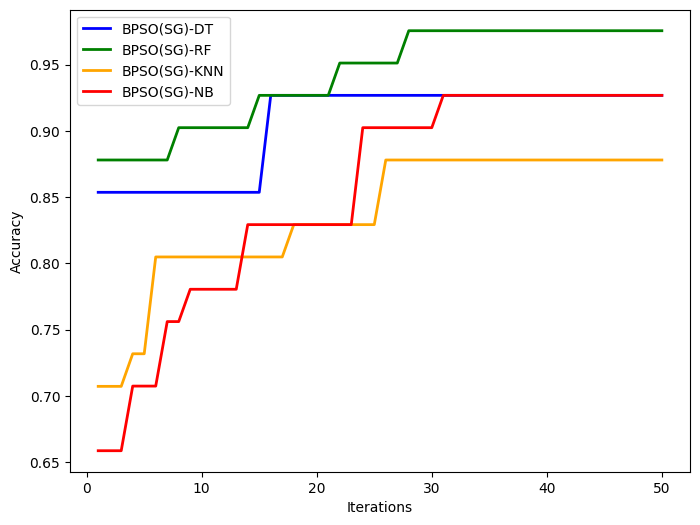

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

iterations = np.arange(1, 51)

accuracy_decision_tree = np.array([0.8536] * 15 + [0.9268] * 35)
accuracy_random_forest = np.array([0.878] * 7 + [0.9024] * 7 + [0.9268] * 7 + [0.9512] * 6 + [0.9756] * 23)
accuracy_knn = np.array([0.7071] * 3 + [0.7317] * 2 + [0.8048] * 12 + [0.8292] * 8 + [0.878] * 25)
accuracy_naive_bayes = np.array([0.6585] * 3 + [0.7073] * 3 + [0.756] * 2 + [0.7804] * 5 + [0.8292] * 10 + [0.9024] * 7 + [0.9268] * 9)

def adjust_length(arr, target_length=50):
    if len(arr) < target_length:
        return np.pad(arr, (0, target_length - len(arr)), 'edge')
    else:
        return arr[:target_length]

accuracy_decision_tree = adjust_length(accuracy_decision_tree)
accuracy_random_forest = adjust_length(accuracy_random_forest)
accuracy_knn = adjust_length(accuracy_knn)
accuracy_naive_bayes = adjust_length(accuracy_naive_bayes)

plt.figure(figsize=(8, 6))

plt.plot(iterations, accuracy_decision_tree, label='BPSO(SG)-DT', color='blue', linewidth=2)

plt.plot(iterations, accuracy_random_forest,label='BPSO(SG)-RF', color='green', linewidth=2)

plt.plot(iterations, accuracy_knn, label='BPSO(SG)-KNN', color='orange', linewidth=2)

plt.plot(iterations, accuracy_naive_bayes, label='BPSO(SG)-NB', color='red', linewidth=2)

plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
plt.savefig("BPSO(SG)-I vs Accuracy.png")

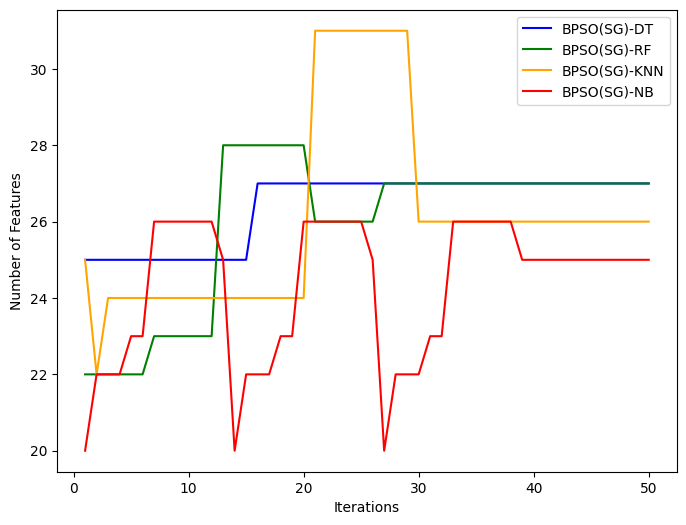

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

iterations_dt = np.arange(1, 51)
features_dt = np.array([25]*15 + [27]*35)

iterations_rf = np.arange(1, 51)
features_rf = np.array([22]*6 + [23]*6 + [28]*8 + [26]*6 + [27]*24)

iterations_knn = np.arange(1, 51)
features_knn = np.array([25, 22, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
                         24, 24, 24, 24, 24, 24, 24, 24, 31, 31, 31, 31,
                         31, 31, 31, 31, 31, 26, 26, 26, 26, 26, 26, 26,
                         26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26,
                         26, 26])

iterations_nb = np.arange(1, 51)
features_nb = np.array([20, 22, 22, 22, 23, 23, 26, 26, 26, 26, 26, 26,
                        25]*3 + [25]*2 + [25]*2 + [25]*7 + [19]*8)

features_dt = adjust_length(features_dt)
features_rf = adjust_length(features_rf)
features_knn = adjust_length(features_knn)
features_nb = adjust_length(features_nb)

plt.figure(figsize=(8, 6))

plt.plot(iterations_dt, features_dt, label='BPSO(SG)-DT', color='blue')
plt.plot(iterations_rf, features_rf, label='BPSO(SG)-RF', color='green')
plt.plot(iterations_knn, features_knn, label='BPSO(SG)-KNN', color='orange')
plt.plot(iterations_nb, features_nb, label='BPSO(SG)-NB', color='red')

plt.xlabel("Iterations")
plt.ylabel("Number of Features")
plt.legend()
plt.show()
plt.savefig("BPSO(SG)-I vs Features.png")

V2

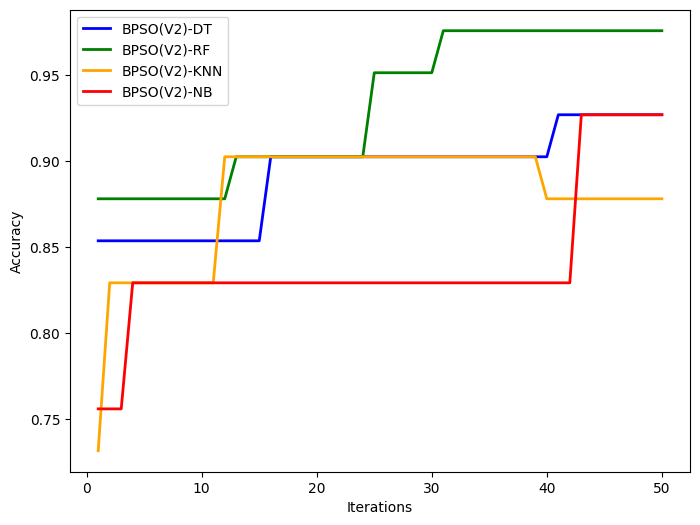

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

iterations = np.arange(1, 51)

accuracy_decision_tree = np.array([0.8536] * 15 + [0.9024] * 25 + [0.9268] * 10)
accuracy_random_forest = np.array([0.878] * 12 + [0.9024] * 12 + [0.9512] * 6 + [0.9756] * 10)
accuracy_knn = np.array([0.7317] + [0.8292] * 10 + [0.9024] * 28 + [0.878] * 1)
accuracy_naive_bayes = np.array([0.756] * 3 + [0.8292] * 39 + [0.9268] * 8)

def adjust_length(arr, target_length=50):
    if len(arr) < target_length:
        return np.pad(arr, (0, target_length - len(arr)), 'edge')
    else:
        return arr[:target_length]

accuracy_decision_tree = adjust_length(accuracy_decision_tree)
accuracy_random_forest = adjust_length(accuracy_random_forest)
accuracy_knn = adjust_length(accuracy_knn)
accuracy_naive_bayes = adjust_length(accuracy_naive_bayes)

plt.figure(figsize=(8, 6))

plt.plot(iterations, accuracy_decision_tree, label='BPSO(V2)-DT', color='blue', linewidth=2)
plt.plot(iterations, accuracy_random_forest, label='BPSO(V2)-RF', color='green', linewidth=2)
plt.plot(iterations, accuracy_knn, label='BPSO(V2)-KNN', color='orange', linewidth=2)
plt.plot(iterations, accuracy_naive_bayes, label='BPSO(V2)-NB', color='red', linewidth=2)
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
plt.savefig("BPSO(V2)-I vs Accuracy.png")

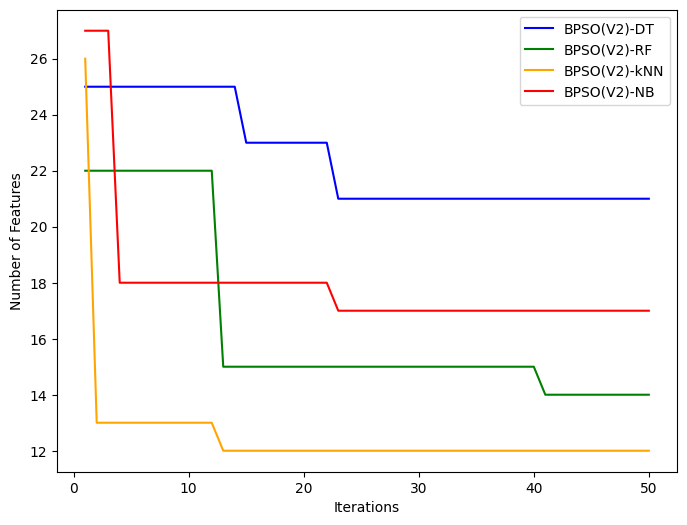

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

iterations_dt = np.arange(1, 51)
features_dt = np.array([25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
                           25, 25, 25, 25, 23, 23, 23, 23, 23, 23,
                           23, 23, 21, 21, 21, 21, 21, 21, 21, 21,
                           21, 21, 21, 21, 21, 21, 21, 21, 21, 21,
                           21, 21, 21, 21, 21, 21, 21, 21, 21, 21])

iterations_rf = np.arange(1, 51)
features_rf = np.array([22, 22, 22, 22, 22, 22, 22, 22, 22, 22,
                               22, 22, 15, 15, 15, 15, 15, 15, 15, 15,
                               15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
                               15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
                               14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
                               14, 14, 14])

iterations_knn = np.arange(1, 51)
features_knn = np.array([26, 13, 13, 13, 13, 13, 13, 13, 13, 13,
                                13, 13, 12, 12, 12, 12, 12, 12, 12, 12,
                                12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
                                12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
                                12, 12, 12, 12, 12, 12, 12, 12, 12, 12])

iterations_nb = np.arange(1, 51)
features_nb = np.array([27, 27, 27, 18, 18, 18, 18, 18, 18, 18,
                               18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
                               18, 18, 17, 17, 17, 17, 17, 17, 17, 17,
                               17, 17, 17, 17, 17, 17, 17, 17, 17, 17,
                               17, 17, 17, 17, 17, 17, 17, 17, 17, 17])

features_dt = adjust_length(features_dt)
features_rf = adjust_length(features_rf)
features_knn = adjust_length(features_knn)
features_nb = adjust_length(features_nb)

plt.figure(figsize=(8, 6))
plt.plot(iterations_dt, features_dt, label='BPSO(V2)-DT', color='blue')
plt.plot(iterations_rf, features_rf, label='BPSO(V2)-RF', color='green')
plt.plot(iterations_knn, features_knn, label='BPSO(V2)-kNN', color='orange')
plt.plot(iterations_nb, features_nb, label='BPSO(V2)-NB', color='red')

plt.xlabel("Iterations")
plt.ylabel("Number of Features")
plt.legend()
plt.show()
plt.savefig("BPSO(V2)-I vs Features.png")